In [ ]:
# Problem 1

In [1]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Material:
    def __init__(self, rho0, c, n):
        self.rho0 = rho0
        self.c = c
        self.n = n

    def density(self, P):
        return self.rho0 + self.c * P**self.n

In [3]:
iron = Material(rho0=8.3e3, c=3.49e-3, n=5.28e-1)

In [15]:
# Constants
G = 6.67e-11
R_earth = 6.371e6
M_earth = 5.97e24
rho0 = 8.3e3  
c = 3.49e-3  
n = 5.28e-1  


# rate of change for Pressure
def f(m, P, r, material):
    return -G*m*material.density(P)/r**2

# rate of change for mass
def g(P, r, material):
    return 4*np.pi*material.density(P)*r**2

iron = Material(rho0=8.3e3, c=3.49e-3, n=5.28e-1)  # example material

# Performs 4th order Runge Kutta for coupled equations
def runge_kutta(m, P, r, dr, material):
    k1 = dr*f(m, P, r, material)
    l1 = dr*g(P, r, material)
    k2 = dr*f(m + l1/2, P + k1/2, r+0.5*dr, material)
    l2 = dr*g(P + k1/2, r+0.5*dr, material)
    k3 = dr*f(m + l2/2, P + k2/2, r+0.5*dr, material)
    l3 = dr*g(P + k2/2, r+0.5*dr, material)
    k4 = dr*f(m + l3, P + k3, r + dr, material)
    l4 = dr*g(P + k3, r + dr, material)

    P_n_1 = P + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    m_n_1 = m + (1/6)*(l1 + 2*l2 + 2*l3 + l4)

    return P_n_1, m_n_1

# Integrates until Pressure reaches negative or 0
def integrate(m0, P0, r0, dr, material, max_iters=10000):
    m = m0
    P = P0
    r = r0
    r_values = []
    m_values = []
    P_values = []

    iteration = 0

    # Condition to check if pressure has reached negative
    while True:
        P, m = runge_kutta(m, P, r, dr, material)
        if not np.isfinite(P) or isinstance(P, complex) or P <= 0 or (iteration >= max_iters):
            break
        r = r + dr

        r_values.append(r)
        m_values.append(m)
        P_values.append(P)

        iteration += 1

    return r_values, m_values, P_values, iteration

# Usage
dr = R_earth / 1000  # example value
r0 = dr  # starting at dr distance
m0 = 4/3 * np.pi * r0**3 * rho0  # starting mass
Pc = 1e12  # central pressure, example value

r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, iron)


Final radius in terms of Earth's radius: 0.98
Final mass in terms of Earth's mass: 2.081298469469342


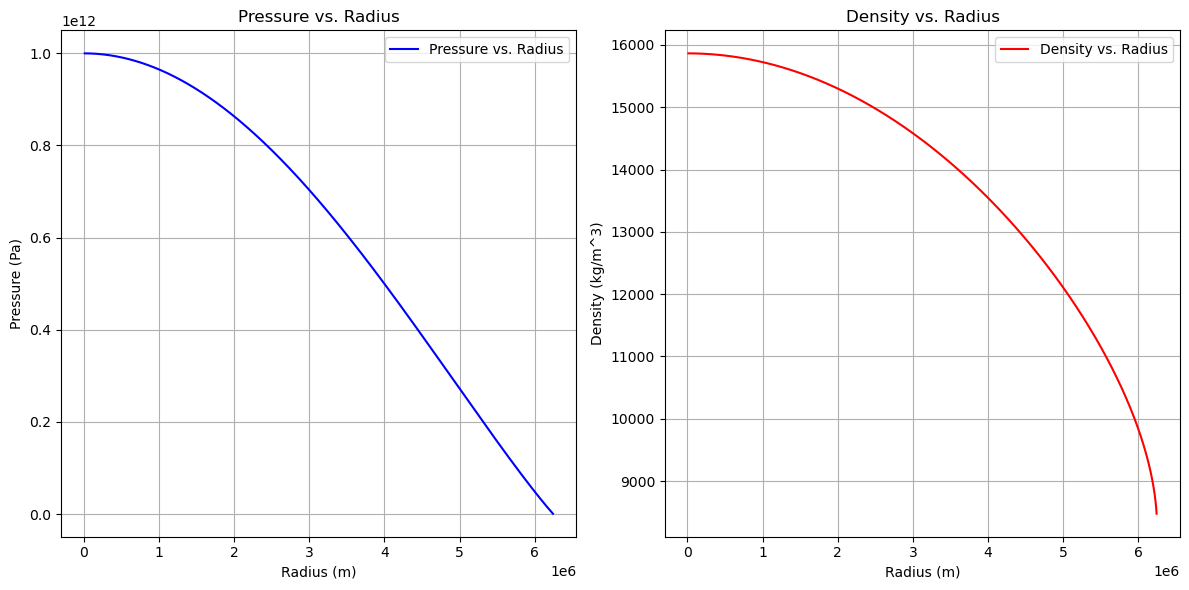

In [5]:
# Calculate the density list
density_list = [iron.density(P) for P in P_list]

# Convert radius to Earth radii and mass to Earth masses
R_earth = 6.371e6  # in meters
M_earth = 5.972e24  # in kg

# The final radius and mass
final_radius = r_list[len(r_list)-1] / R_earth
final_mass = m_list[len(r_list)-1] / M_earth

print(f"Final radius in terms of Earth's radius: {final_radius}")
print(f"Final mass in terms of Earth's mass: {final_mass}")

# Creating the plots
plt.figure(figsize=(12, 6))

# Pressure vs. Radius
plt.subplot(1, 2, 1)
plt.plot(r_list, P_list, '-b', label='Pressure vs. Radius')
plt.xlabel('Radius (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure vs. Radius')
plt.grid(True)
plt.legend(loc='upper right')

# Density vs. Radius
plt.subplot(1, 2, 2)
plt.plot(r_list, density_list, '-r', label='Density vs. Radius')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density vs. Radius')
plt.grid(True)
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Problem 2

In [7]:
def rho(P):
    if P <= 0:
        return 0  # or some other appropriate response to non-positive pressures
    else:
        return rho0 + c*P**n

In [6]:
min_pressure =83e9
max_pressure = 145e12
number_pressures = 50
# Creating an array of central pressures
central_pressures = np.linspace(start=min_pressure, stop=max_pressure, num=number_pressures)

M_earth = 5.972e24
R_earth = 6.371e6

masses = []
radii = []

for Pc in central_pressures:
    r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, iron)

    R = r_list[len(r_list)-1] / R_earth  # Convert to Earth radii
    M = m_list[len(r_list)-1] / M_earth  # Convert to Earth masses

    radii.append(R)
    masses.append(M)


C:\Users\julia\AppData\Local\Temp\ipykernel_19480\1823467560.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return self.rho0 + self.c * P**self.n


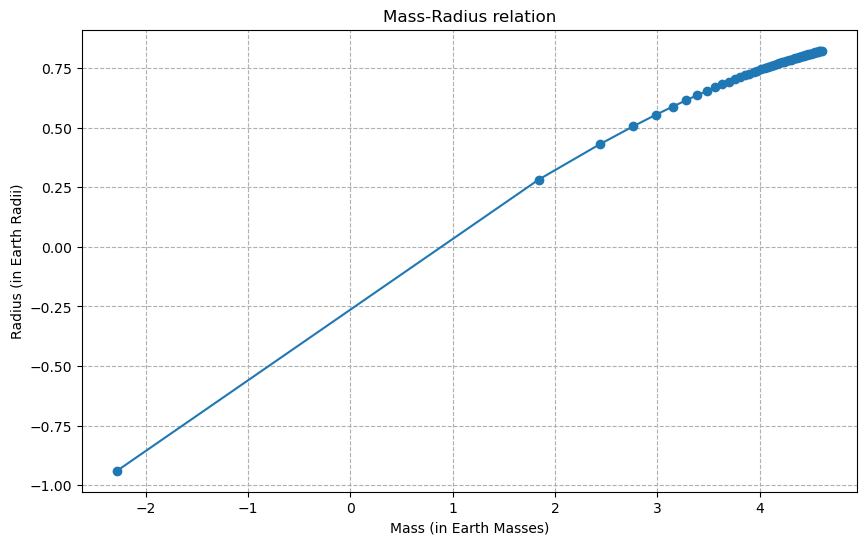

In [9]:
radii_array = np.array(radii)
masses_array = np.array(masses)

log_radii = np.log(radii_array)
log_masses = np.log(masses_array)

plt.figure(figsize=(10, 6))
plt.plot(log_masses, log_radii, '-o')  # log-log plot for both axes
plt.title('Mass-Radius relation')
plt.xlabel('Mass (in Earth Masses)')
plt.ylabel('Radius (in Earth Radii)')
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
# Problem 3

In [10]:
# Materials h2O and mgsio3
h2o = Material(rho0=146e1, c=3.11e-3, n=5.13e-1)
mgsio3 = Material(rho0=41e2, c=161e-5, n=5.49e-1)

C:\Users\julia\AppData\Local\Temp\ipykernel_19480\1823467560.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return self.rho0 + self.c * P**self.n


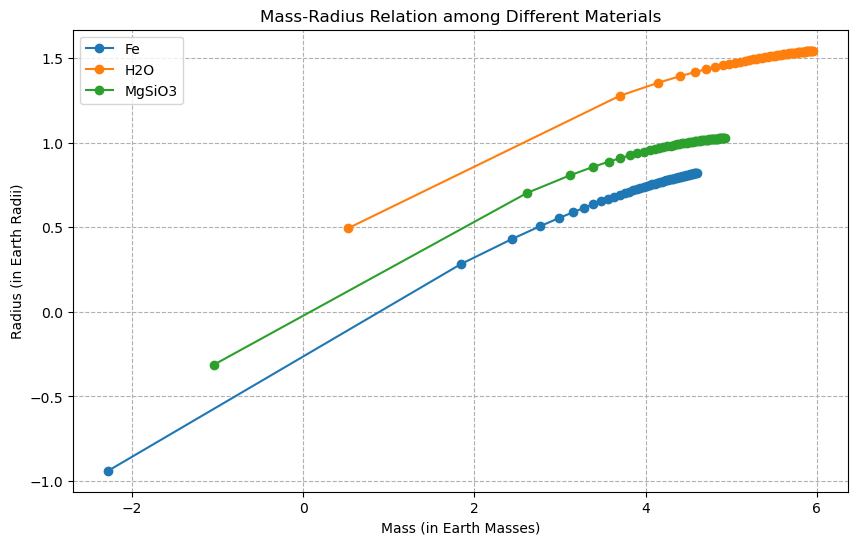

In [12]:
# Arrays to store results for different materials
radii_h2o, masses_h2o = [], []
radii_mgsio3, masses_mgsio3 = [], []

for Pc in central_pressures:
    # For H2O
    r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, h2o)
    radii_h2o.append(r_list[-1] / R_earth)
    masses_h2o.append(m_list[-1] / M_earth)

    # For MgSiO3
    r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, mgsio3)
    radii_mgsio3.append(r_list[-1] / R_earth)
    masses_mgsio3.append(m_list[-1] / M_earth)

radii_array_h2o = np.array(radii_h2o)
masses_array_h2o = np.array(masses_h2o)

log_radii_h2o = np.log(radii_array_h2o)
log_masses_h2o = np.log(masses_array_h2o)

radii_array_mgsio3 = np.array(radii_mgsio3)
masses_array_mgsio3 = np.array(masses_mgsio3)

log_radii_mgsio3 = np.log(radii_array_mgsio3)
log_masses_mgsio3 = np.log(masses_array_mgsio3)

plt.figure(figsize=(10, 6))

# Plotting for Fe, H2O, MgSiO3
plt.plot(log_masses, log_radii, '-o', label='Fe')  
plt.plot(log_masses_h2o, log_radii_h2o, '-o', label='H2O')
plt.plot(log_masses_mgsio3, log_radii_mgsio3, '-o', label='MgSiO3')


plt.xlabel('Mass (in Earth Masses)')
plt.ylabel('Radius (in Earth Radii)')
plt.title('Mass-Radius Relation among Different Materials')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


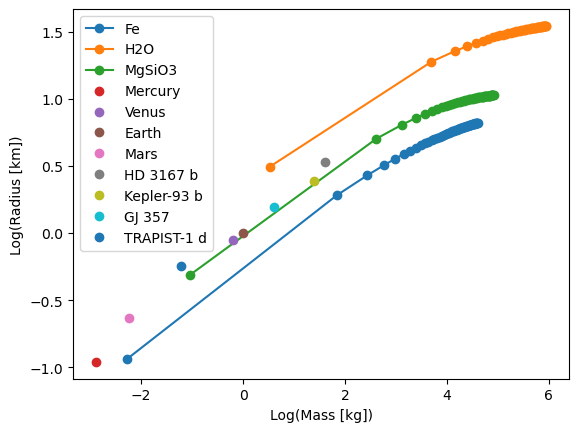

In [21]:
plt.plot(log_masses, log_radii, '-o', label='Fe')  
plt.plot(log_masses_h2o, log_radii_h2o, '-o', label='H2O')
plt.plot(log_masses_mgsio3, log_radii_mgsio3, '-o', label='MgSiO3')

planets = {
    'Mercury': (0.33e24/M_earth, 4879*1000 / 2/R_earth),
    'Venus': (4.87e24/M_earth, 12104*1000 / 2/R_earth),
    'Earth': (5.97e24/M_earth, 12756*1000 / 2/R_earth),
    'Mars': (0.642e24/M_earth, 6792*1000 / 2/R_earth),
    'HD 3167 b': (5.02, 1.7),
    'Kepler-93 b': (4.02, 1.478),
    'GJ 357': (1.84, 1.217),
    'TRAPIST-1 d': (0.297, 0.784),
}

# Loop through planets, convert values, and plot them on the log-log plot
for planet, (mass, radius) in planets.items():
    # Logarithmic values of mass and radius for plot
    log_mass = np.log(mass)
    log_radius = np.log(radius)

    # Adding points to the plot
    plt.plot(log_mass, log_radius, 'o', label=planet)  # 'o' specifies the marker shape

# Add legend and labels
plt.xlabel("Log(Mass [kg])")
plt.ylabel("Log(Radius [km])")
plt.legend()  # Displays legend entries for each label specified in plt.plot()

# Show plot
plt.show()

In [ ]:
# Errors
lanet_errors = {
    'HD 3167 b': {'mass_error': (upper_mass_error, lower_mass_error), 'radius_error': (upper_radius_error, lower_radius_error)},